In [119]:
## Abhiram Kakuturu
## Homework 1 -- Random Number Generation Analysis
## New runs can be generated by executing "exe.sh" found in "/src"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [113]:
## Store raw random number output files (with seed variation appended to file name) in hash
data_path = os.getcwd() + '/Output'
raw_files = {}
int_rand_files = {}

for rand_file in os.listdir(data_path):
    file = open('Output/'+rand_file,'r')
    if bool(re.match(re.compile("raw_."),rand_file)):
        raw_files[rand_file] = np.loadtxt(file)
    else:
        int_rand_files[rand_file] = np.loadtxt(file)
    file.close()

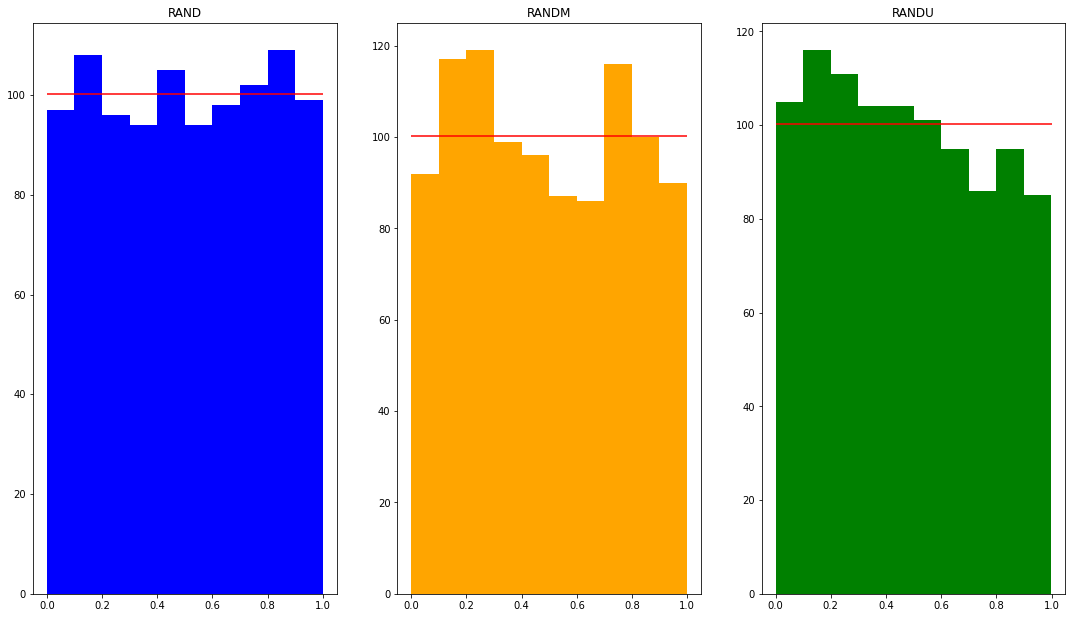

In [118]:
## This is a demonstration of the first run of the generate_raw.cpp file
## Plots are based on initial seed 77777
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)

ax[0].hist(raw_files["raw_rand77777.txt"], color='blue')
ax[0].hlines(len(raw_files["raw_rand77777.txt"])/10, 0,1, 'r')
ax[0].set_title("RAND")

ax[1].hist(raw_files["raw_randm77777.txt"], color='orange')
ax[1].hlines(len(raw_files["raw_randm77777.txt"])/10, 0,1, 'r')
ax[1].set_title("RANDM")

ax[2].hist(raw_files["raw_randu77777.txt"], color='green')
ax[2].hlines(len(raw_files["raw_randu77777.txt"])/10, 0,1, 'r')
ax[2].set_title("RANDU")
plt.show()

In [115]:
# These file names correspond to the following histogram plots
for file in sorted(raw_files.keys()):
    print(file)

raw_rand12.txt
raw_rand2.txt
raw_rand3.txt
raw_rand305.txt
raw_rand314159.txt
raw_rand3569.txt
raw_rand4563.txt
raw_rand77777.txt
raw_rand89.txt
raw_randm12.txt
raw_randm2.txt
raw_randm3.txt
raw_randm305.txt
raw_randm314159.txt
raw_randm3569.txt
raw_randm4563.txt
raw_randm77777.txt
raw_randm89.txt
raw_randu12.txt
raw_randu2.txt
raw_randu3.txt
raw_randu305.txt
raw_randu314159.txt
raw_randu3569.txt
raw_randu4563.txt
raw_randu77777.txt
raw_randu89.txt


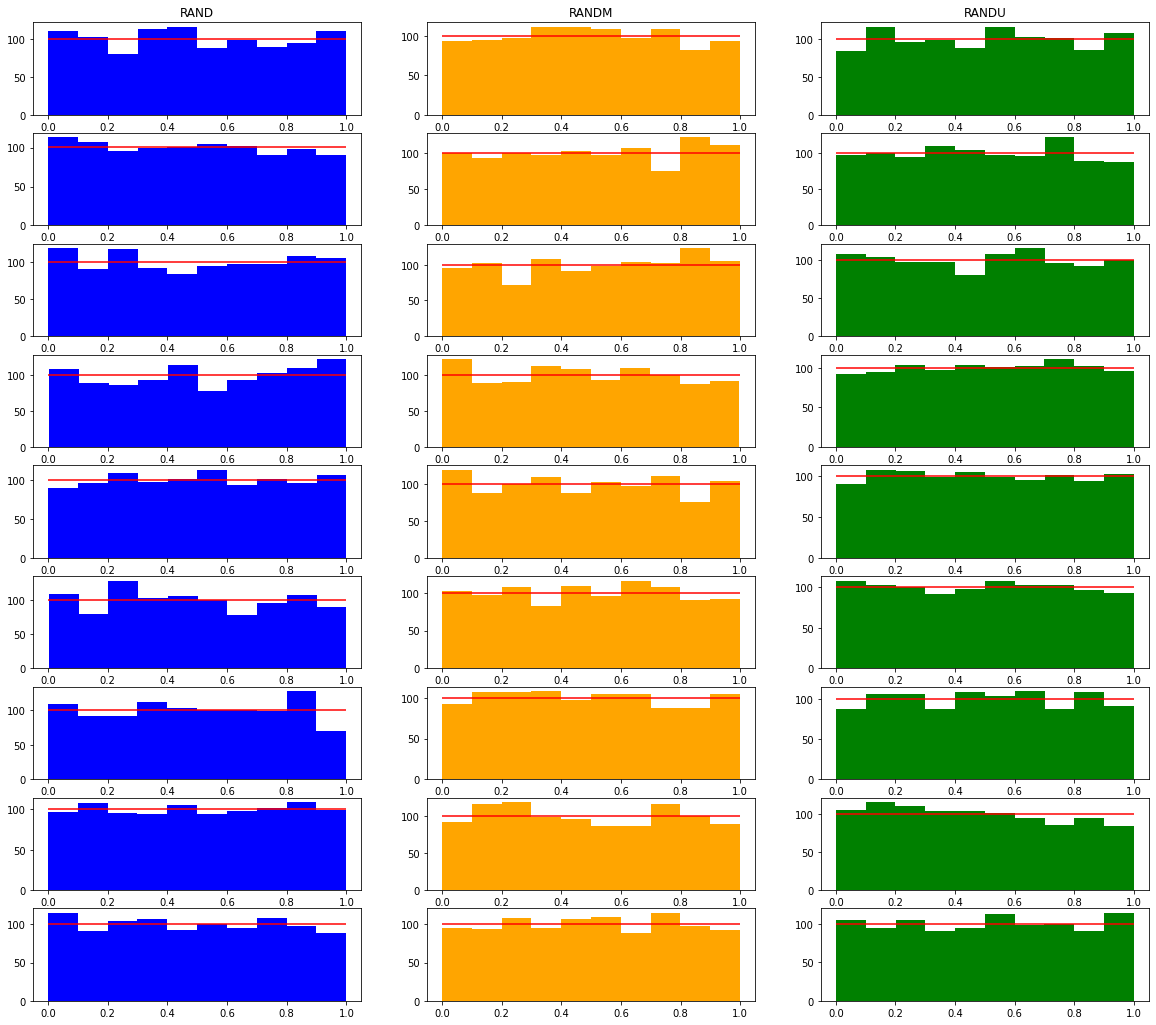

In [116]:
## We can check how the other seeds fared
import math

fig, ax = plt.subplots(9,3)
fig.set_size_inches(20, 18)

ax[0][0].set_title("RAND")
ax[0][1].set_title("RANDM")
ax[0][2].set_title("RANDU")

hist_dev = {}
i = 0
sample_size = len(raw_files["raw_rand12.txt"])
expected_hits = sample_size/10
std_err = math.sqrt(expected_hits)


for file in sorted(raw_files.keys())[0:9]:
    hist,bins = np.histogram(raw_files[file],10,[0,1])
    dev = [math.fabs(val-expected_hits)/std_err for val in hist]
    hist_dev[file]= dev
    
    ax[i][0].hist(raw_files[file], color='blue')
    ax[i][0].hlines(len(raw_files[file])/10, 0,1, 'r')
    i+=1

j = 0
for file in sorted(raw_files.keys())[9:18]:
    hist,bins = np.histogram(raw_files[file],10,[0,1])
    dev = [math.fabs(val-expected_hits)/std_err for val in hist]
    hist_dev[file]= dev
    
    ax[j][1].hist(raw_files[file], color='orange')
    ax[j][1].hlines(len(raw_files[file])/10, 0,1, 'r')
    j+=1

k = 0
for file in sorted(raw_files.keys())[18:]:
    hist,bins = np.histogram(raw_files[file],10,[0,1])
    dev = [math.fabs(val-expected_hits)/std_err for val in hist]
    hist_dev[file]= dev
    
    ax[k][2].hist(raw_files[file], color='green')
    ax[k][2].hlines(len(raw_files[file])/10, 0,1, 'r')
    k+=1

plt.show()

In [85]:
## Report the outliers we find in the data
CL = 2
bins = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print("OUTLIERS")
print("FILENAME       OUTLIER BINS")
for file, dev in hist_dev.items():
    outliers=[]
    for indx, val in enumerate(dev):
        if val>=CL:
            bin_range = str(bins[indx])+"->"+str(bins[indx+1])
            outliers.append(bin_range)
    print(file, outliers)

OUTLIERS
FILENAME       OUTLIER BINS
raw_rand12.txt ['0.8->0.9']
raw_rand2.txt ['0.6->0.7']
raw_rand3.txt []
raw_rand305.txt []
raw_rand314159.txt []
raw_rand3569.txt ['0.1->0.2']
raw_rand4563.txt []
raw_rand77777.txt []
raw_rand89.txt ['0.9->1.0']
raw_randm12.txt []
raw_randm2.txt ['0.7->0.8', '0.8->0.9']
raw_randm3.txt ['0.2->0.3', '0.8->0.9']
raw_randm305.txt ['0.0->0.1']
raw_randm314159.txt ['0.8->0.9']
raw_randm3569.txt []
raw_randm4563.txt []
raw_randm77777.txt []
raw_randm89.txt []
raw_randu12.txt []
raw_randu2.txt ['0.7->0.8']
raw_randu3.txt []
raw_randu305.txt []
raw_randu314159.txt []
raw_randu3569.txt []
raw_randu4563.txt []
raw_randu77777.txt []
raw_randu89.txt []


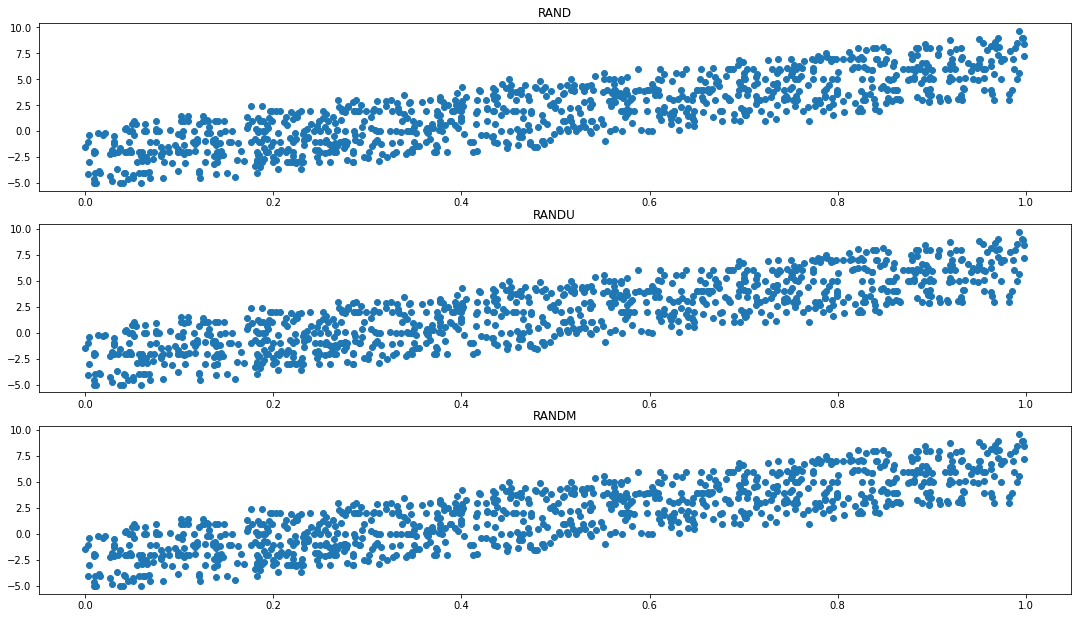

In [86]:
## We observe the triplet pattern evident in the raw decimal computations
randu_triplets, randm_triplets, rand_triplets = ([], ) * 3
x_randu, x_randm, x_rand = ([], ) * 3

raw_rand = raw_files["raw_rand77777.txt"]
raw_randu = raw_files["raw_randu77777.txt"]
raw_randm = raw_files["raw_randm77777.txt"]

for i in range(0,len(raw_files["raw_rand77777.txt"])-2,3):
    x_rand.append(raw_rand[i])
    rand_triplets.append(9*raw_rand[i]-6*raw_rand[i+1]+raw_rand[i+2])

    x_randu.append(raw_randu[i])
    randu_triplets.append(9*raw_randu[i]-6*raw_randu[i+1]+raw_randu[i+2])

    x_randm.append(raw_randm[i])
    randm_triplets.append(9*raw_randm[i]-6*raw_randm[i+1]+raw_randm[i+2])

fig, ax = plt.subplots(3,1)
fig.set_size_inches(18.5, 10.5)
ax[0].scatter(x_rand, rand_triplets)
ax[0].set_title('RAND')
ax[1].scatter(x_randu, randu_triplets)
ax[1].set_title('RANDU')
ax[2].scatter(x_randm, randm_triplets)
ax[2].set_title('RANDM')
plt.show()